In [ ]:
# !pip install tensorflow
# !pip install keras

# Prepare Data

In [ ]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Output class is  5


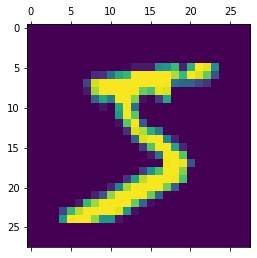

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(x_train[0])
print("Output class is ", y_train[0])

# Keras Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation = 'sigmoid')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.8279 - accuracy: 0.8400
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0988 - accuracy: 0.8801
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.7430 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.4986 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3911 - accuracy: 0.8856


# Performance Evaluation

In [ ]:
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred.shape

(10000,)

In [ ]:
from sklearn.metrics import classification_report

print( classification_report(y_pred, y_test) )

              precision    recall  f1-score   support

           0       0.99      0.56      0.72      1724
           1       1.00      0.43      0.61      2607
           2       0.49      0.25      0.34      1997
           3       0.25      0.16      0.19      1586
           4       0.76      0.58      0.66      1291
           5       0.20      0.43      0.27       410
           6       0.01      0.50      0.01        14
           7       0.24      0.76      0.37       323
           8       0.01      0.44      0.03        32
           9       0.01      0.75      0.02        16

    accuracy                           0.41     10000
   macro avg       0.40      0.49      0.32     10000
weighted avg       0.68      0.41      0.49     10000



In [ ]:
from sklearn.metrics import accuracy_score

print( accuracy_score(y_pred, y_test) )

0.4066


# Effect of Normalization

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation = 'sigmoid')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4658 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9258


# Change Architecture

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1197 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0825 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0632 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0494 - accuracy: 0.9852


# Use Validation Set

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[es])

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2682 - accuracy: 0.9237 - val_loss: 0.1491 - val_accuracy: 0.9539
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1226 - accuracy: 0.9644 - val_loss: 0.1016 - val_accuracy: 0.9692
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0851 - accuracy: 0.9740 - val_loss: 0.0855 - val_accuracy: 0.9754
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.0834 - val_accuracy: 0.9757
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0816 - val_accuracy: 0.9755
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0821 - val_accuracy: 0.9756
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9903 - val_loss: 0.0859 - val_accuracy:

# Second Way to Create the Model

In [ ]:
model = tf.keras.Sequential()

model.add( keras.layers.Flatten(input_shape=(28,28)) )
model.add( keras.layers.Dense(100, activation = 'relu') )
model.add( keras.layers.Dense(10, activation = 'sigmoid') )

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[es])

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2756 - accuracy: 0.9219 - val_loss: 0.1437 - val_accuracy: 0.9570
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1278 - accuracy: 0.9629 - val_loss: 0.1189 - val_accuracy: 0.9640
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0894 - accuracy: 0.9728 - val_loss: 0.0958 - val_accuracy: 0.9708
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0682 - accuracy: 0.9792 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0538 - accuracy: 0.9837 - val_loss: 0.0827 - val_accuracy: 0.9734
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0812 - val_accuracy: 0.9751
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0817 - val_accuracy:

# Thrid Way to Create the Model

In [ ]:
inputs = keras.Input(shape=(28,28), name="digits")
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(100, activation="relu", name="dense_1")(x)
outputs = keras.layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 28, 28)]          0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 predictions (Dense)         (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[es])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2756 - accuracy: 0.9214 - val_loss: 0.1587 - val_accuracy: 0.9517
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9643 - val_loss: 0.1108 - val_accuracy: 0.9669
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9744 - val_loss: 0.0917 - val_accuracy: 0.9719
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9805 - val_loss: 0.0847 - val_accuracy: 0.9740
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0782 - val_accuracy: 0.9759
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0861 - val_accuracy: 0.9737
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0849 - val_accuracy: